Este es el EDA del archivo previamente procesado 'GoogleMaps_Review_Florida'

In [ ]:
#comence importando el dataset 
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Otros/googlemaps_review_florida.csv', lineterminator='\n')

In [ ]:
df['resp_text'].value_counts

In [ ]:
df['rating'].describe()

En la siguiente cuenta, vemos como las personas suben una foto con su reseña, tienden a una mejor experiencia con el servicio, ya que el rating promedio es de 4.3, mientras que si suben una foto es de casi el 4.6

In [ ]:
promedio_pics_si = df[df['pics'] == 'Si']['rating'].mean()
promedio_pics_si

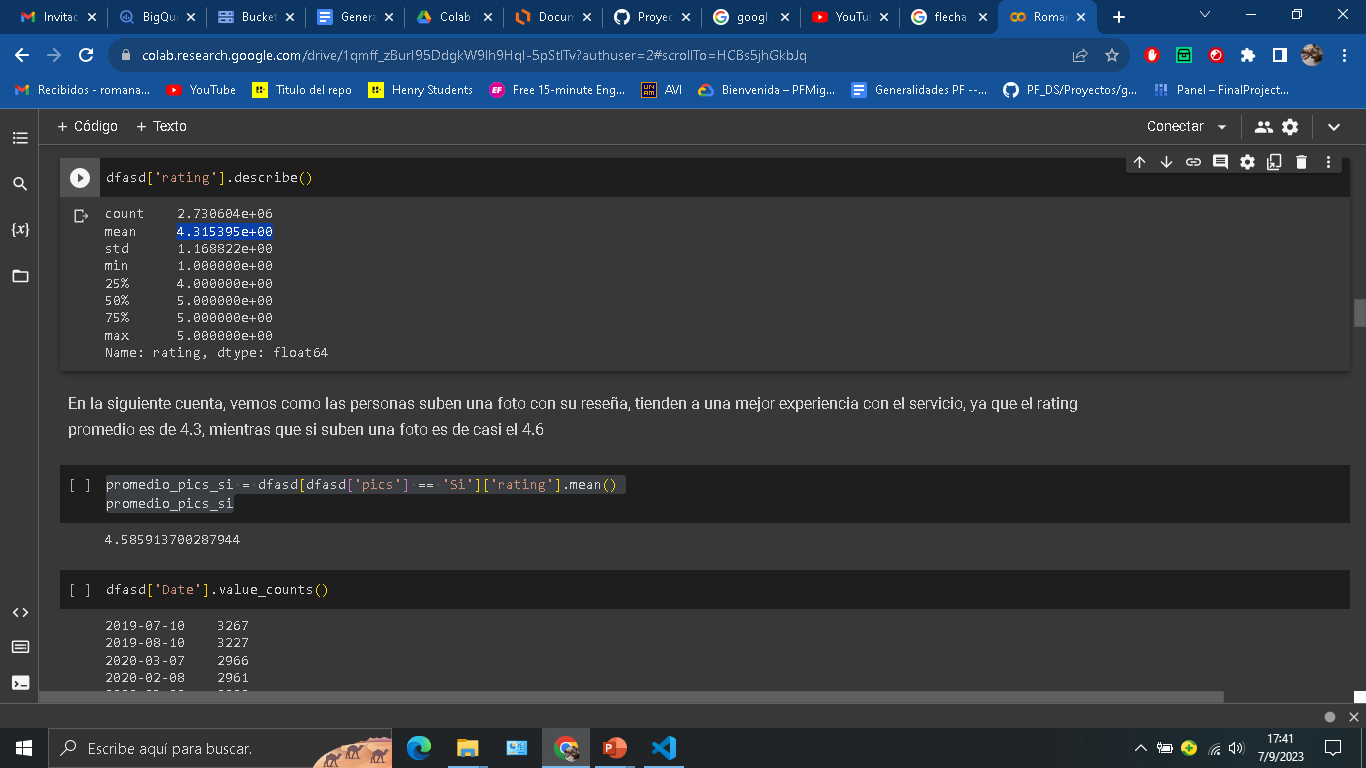

In [ ]:
# Obtiene la lista de años únicos en tus datos
df['Date'] = pd.to_datetime(df['Date'])
years = df['Date'].dt.year.unique()

# Crea un diccionario para almacenar los promedios por año
promedios_por_año = {}

# Itera a través de los años y calcula el promedio para cada año
for year in years:
    df_year = df[df['Date'].dt.year == year]  # Filtra por año
    promedio_numero = df_year['rating'].mean()  # Calcula el promedio de 'numero'
    promedios_por_año[year] = promedio_numero

# Ordena el diccionario por año
promedios_por_año_ordenados = dict(sorted(promedios_por_año.items()))

# El diccionario 'promedios_por_año' ahora contiene los promedios de 'numero' por año
for year, promedio in promedios_por_año_ordenados.items():
    print(f"Promedio de rating en {year}: {promedio}")

En la siguiente imagen vemos el promedio de rating por año en las reviews de Florida

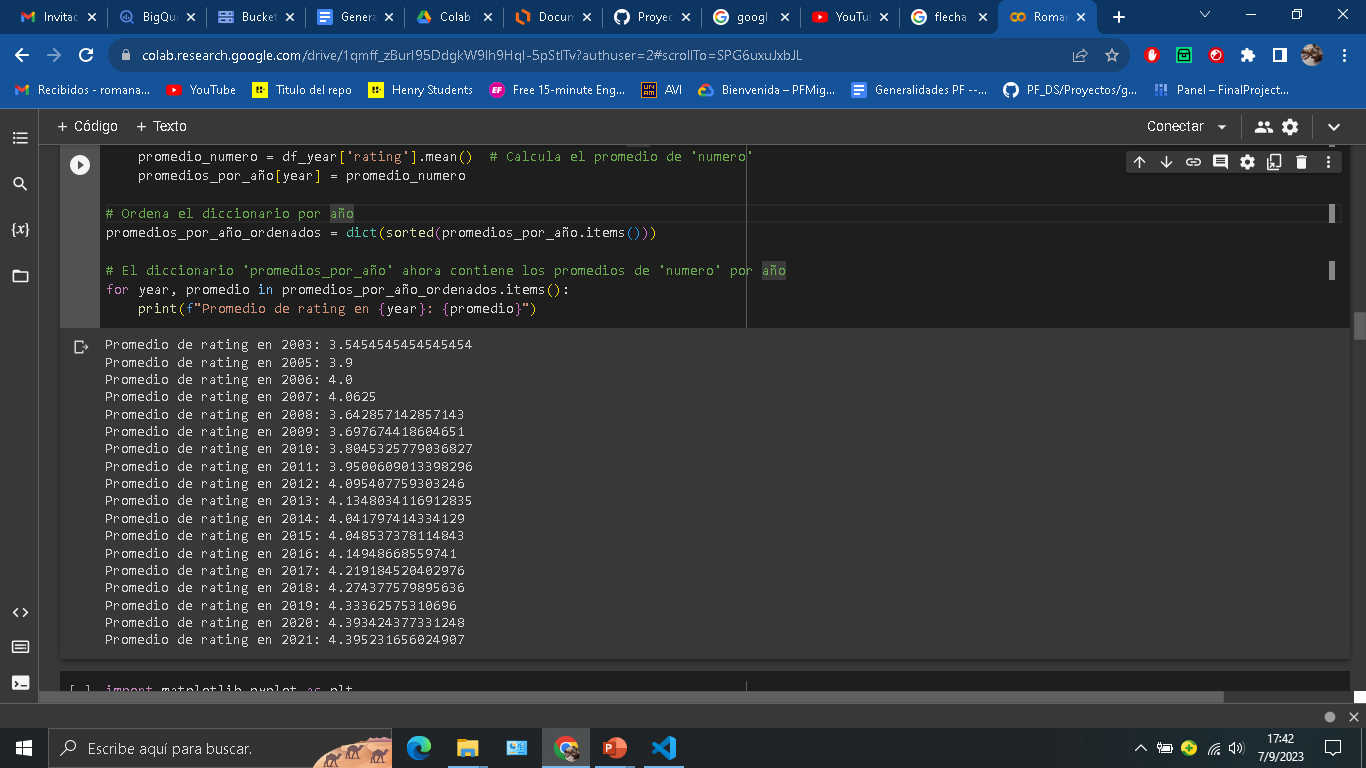

Aquí un gráfico, ya que no es tan intuitivo el cambio desde esa imagen
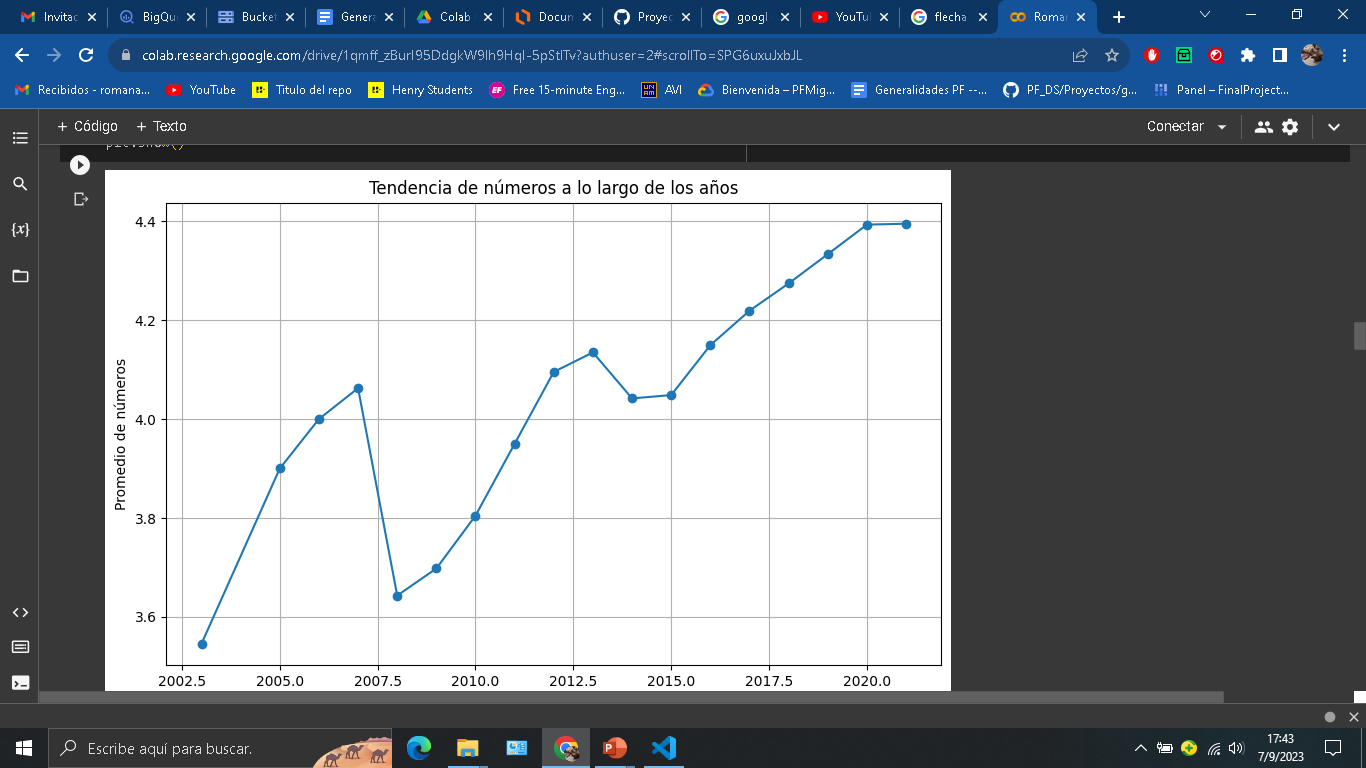

Teniendo en cuenta la columna 'text', que hace referencía al texto de las opiniones de los usuarios, decidí hacer una nube de palabras para ver cuales eran las mas usadas:

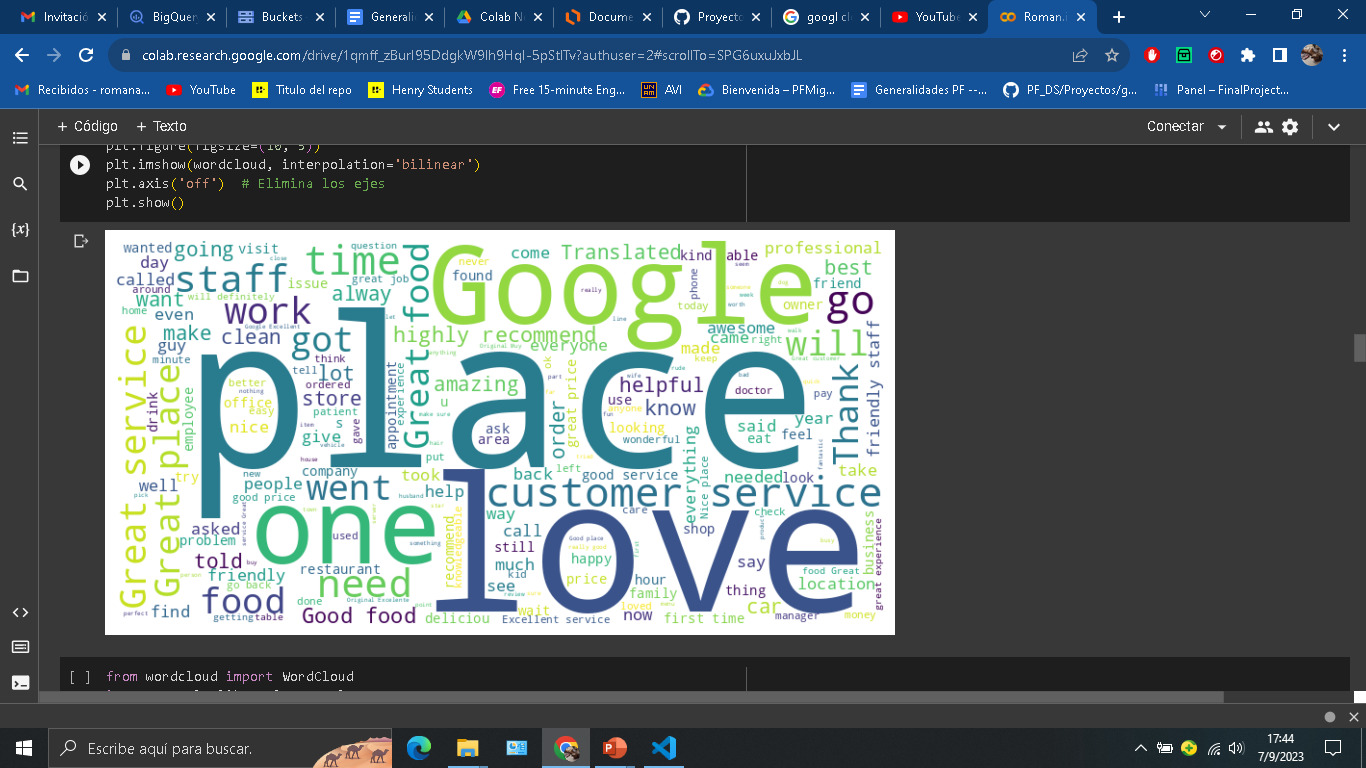

y descubrí que 'love' es la más utilizada, que junto con un rating por año mayor a 4 puntos en la mayoría de los años, podemos deducir que en general las opiniones son positivas.

Tambien hice lo mismo con las respuestas de los negocios, columna 'resp_text'... pero no me pareció muy relevante

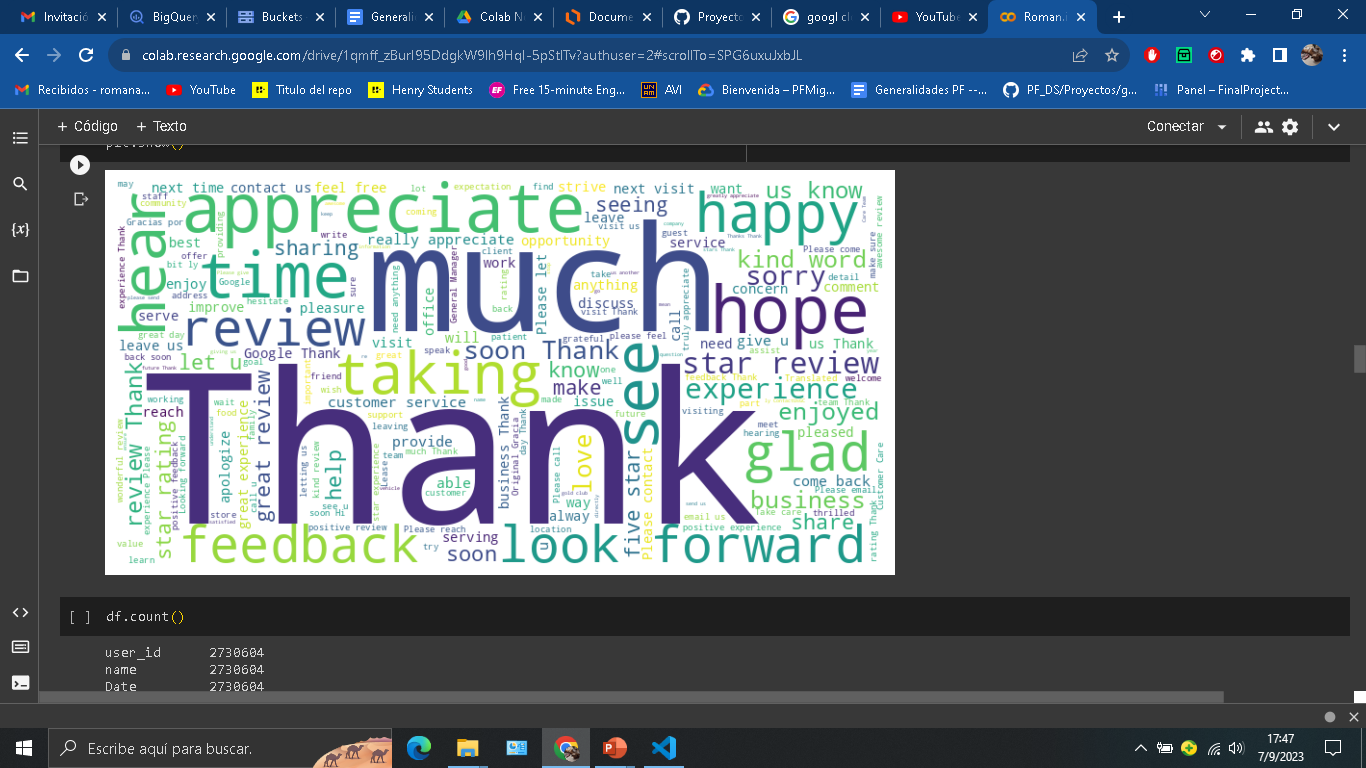

Ahora pruebo hacer un joinn entre el dataset review Florida y el de Metadata, para así poder fitrar por categorías

In [ ]:
#importo el dataset
pd.reset_option('display.float_format')
file_metadata1 = '/content/drive/MyDrive/Otros/googlemaps_metadata_sitios.csv'
df_meta = pd.read_csv(file_metadata1)
#les hago el merge
df_combined2 = pd.merge(df, df_meta, on=['gmap_id'], how="left")
df_combined2 = df_combined2.drop_duplicates(subset=['name_x', 'text'])

Así quedaría el dataset con todas las columnas a la vista:

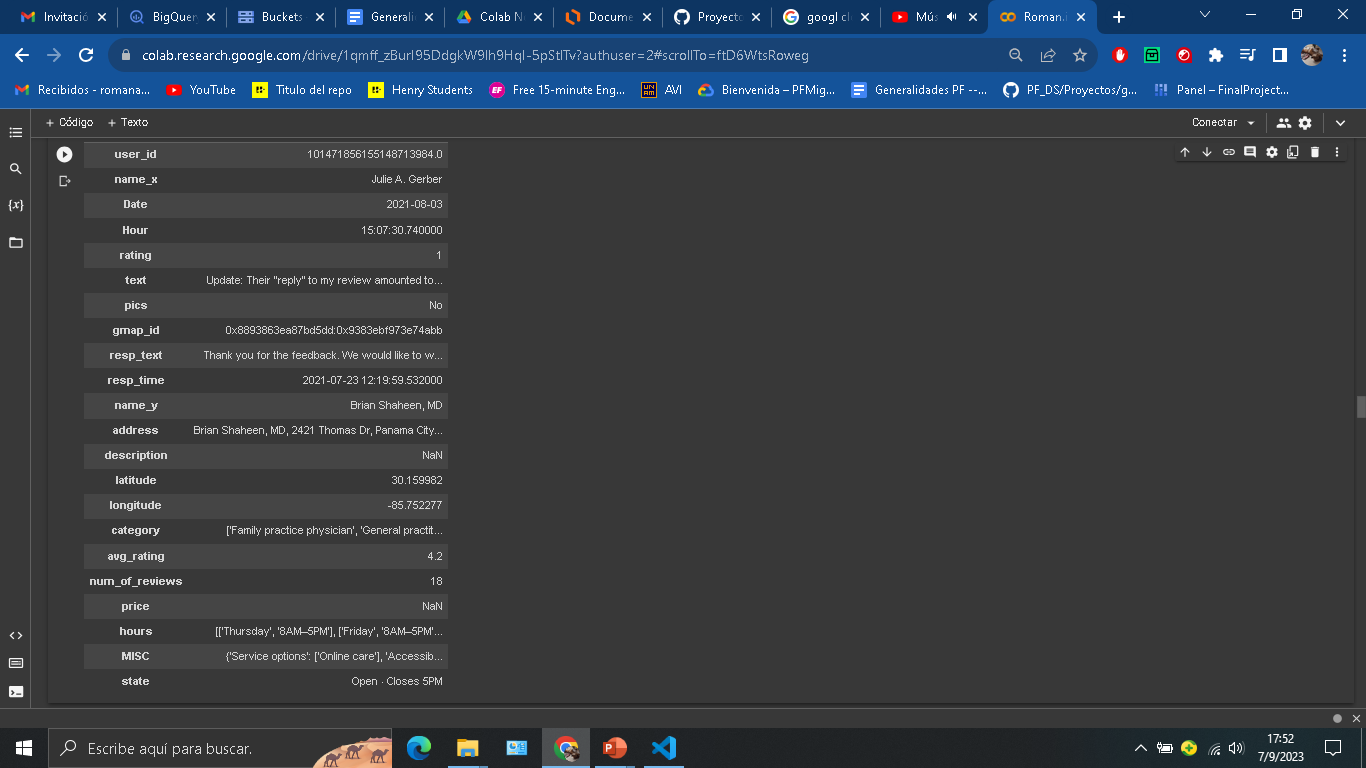

Ahora voy a crear distintos datasets a partir de las categorías mas utilizadas según los EDAs de mis compañeros

In [ ]:
#dataset 1
# aquí para filtrar las filas que contienen la palabra 'objetivo' en la columna categoría
palabra_objetivo = 'Shopping'
df_sin_nulos = df_combined2.dropna(subset=['category'])

# Utiliza la función apply con una función lambda para buscar la palabra en cada lista
filas_filtradas = df_sin_nulos[df_sin_nulos['category'].apply(lambda lista: palabra_objetivo in lista)]

#dataset 2
# aquí para filtrar las filas que contienen la palabra 'objetivo' en la columna categoría
palabra_objetivo2 = 'hotel'
df_sin_nulos2 = df_combined2.dropna(subset=['category'])

# Utiliza la función apply con una función lambda para buscar la palabra en cada lista
filas_filtradas2 = df_sin_nulos2[df_sin_nulos2['category'].apply(lambda lista: palabra_objetivo2 in lista)]

#dataset 3
# aquí para filtrar las filas que contienen la palabra 'objetivo' en la columna categoría
palabra_objetivo3 = 'food'
df_sin_nulos3 = df_combined2.dropna(subset=['category'])

# Utiliza la función apply con una función lambda para buscar la palabra en cada lista
filas_filtradas3 = df_sin_nulos3[df_sin_nulos3['category'].apply(lambda lista: palabra_objetivo3 in lista)]

#dataset 4
# aquí para filtrar las filas que contienen la palabra 'objetivo' en la columna categoría
palabra_objetivo4 = 'health'
df_sin_nulos4 = df_combined2.dropna(subset=['category'])

# Utiliza la función apply con una función lambda para buscar la palabra en cada lista
filas_filtradas4 = df_sin_nulos4[df_sin_nulos4['category'].apply(lambda lista: palabra_objetivo4 in lista)]

#dataset 5
# aquí para filtrar las filas que contienen la palabra 'objetivo' en la columna categoría
palabra_objetivo5 = 'restaurant'
df_sin_nulos5 = df_combined2.dropna(subset=['category'])

# Utiliza la función apply con una función lambda para buscar la palabra en cada lista
filas_filtradas5 = df_sin_nulos5[df_sin_nulos5['category'].apply(lambda lista: palabra_objetivo5 in lista)]

Aquí el resultado de hacer un print de cada dataset promediando el rating por categoría, y además con la cantiad de filas de cada uno:

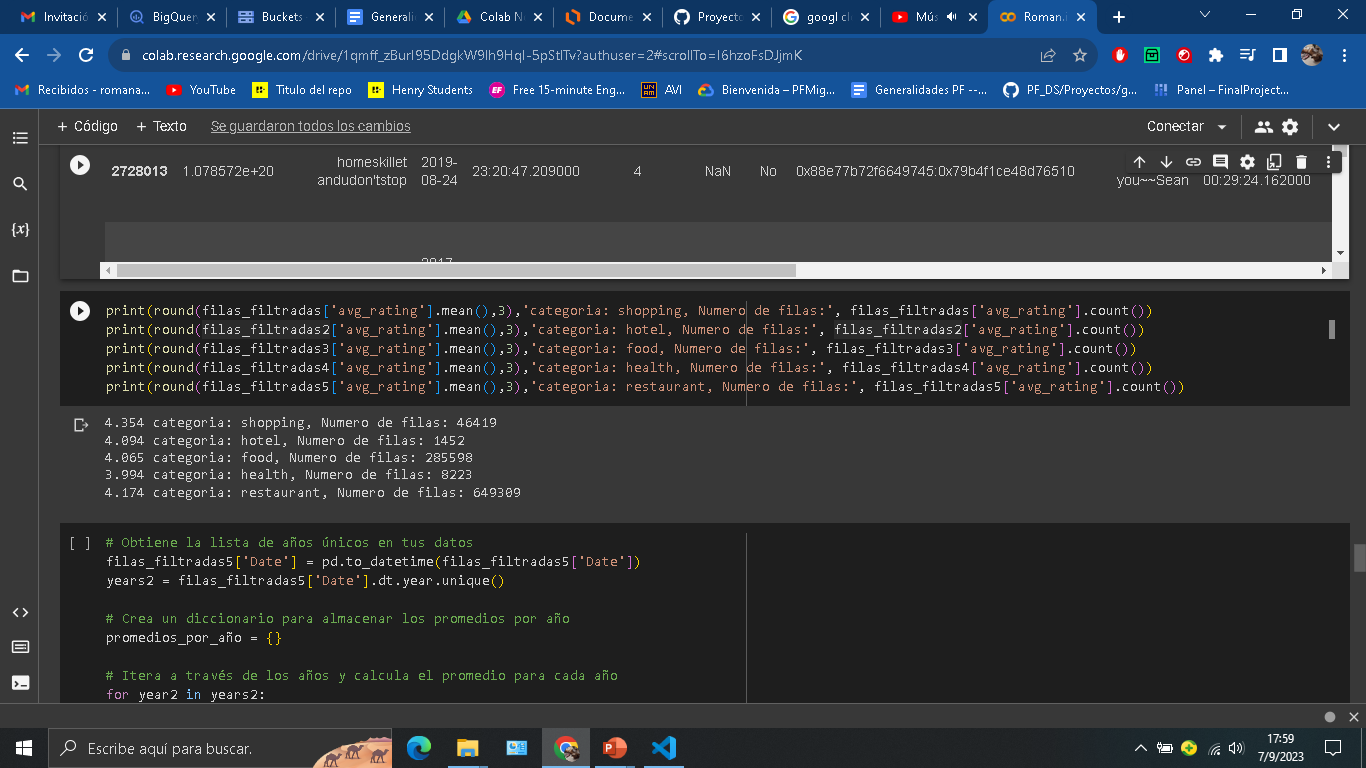

Tras está imagen y viendo el resto de EDAs de mis compañeros, decidimos utilizar la categoría restaurantes

In [ ]:
# Obtiene la lista de años únicos en tus datos
filas_filtradas5['Date'] = pd.to_datetime(filas_filtradas5['Date'])
years2 = filas_filtradas5['Date'].dt.year.unique()

# Crea un diccionario para almacenar los promedios por año
promedios_por_año = {}

# Itera a través de los años y calcula el promedio para cada año
for year2 in years2:
    df_year = filas_filtradas5[filas_filtradas5['Date'].dt.year == year2]  # Filtra por año
    promedio_numero = df_year['rating'].mean()  # Calcula el promedio de 'numero'
    promedios_por_año[year2] = promedio_numero

# Ordena el diccionario por año
promedios_por_año_ordenados = dict(sorted(promedios_por_año.items()))

# El diccionario 'promedios_por_año' ahora contiene los promedios de 'numero' por año
for year2, promedio in promedios_por_año_ordenados.items():
    print(f"Promedio de rating en {year2}: {promedio}")

misma cuenta que antes con los años:

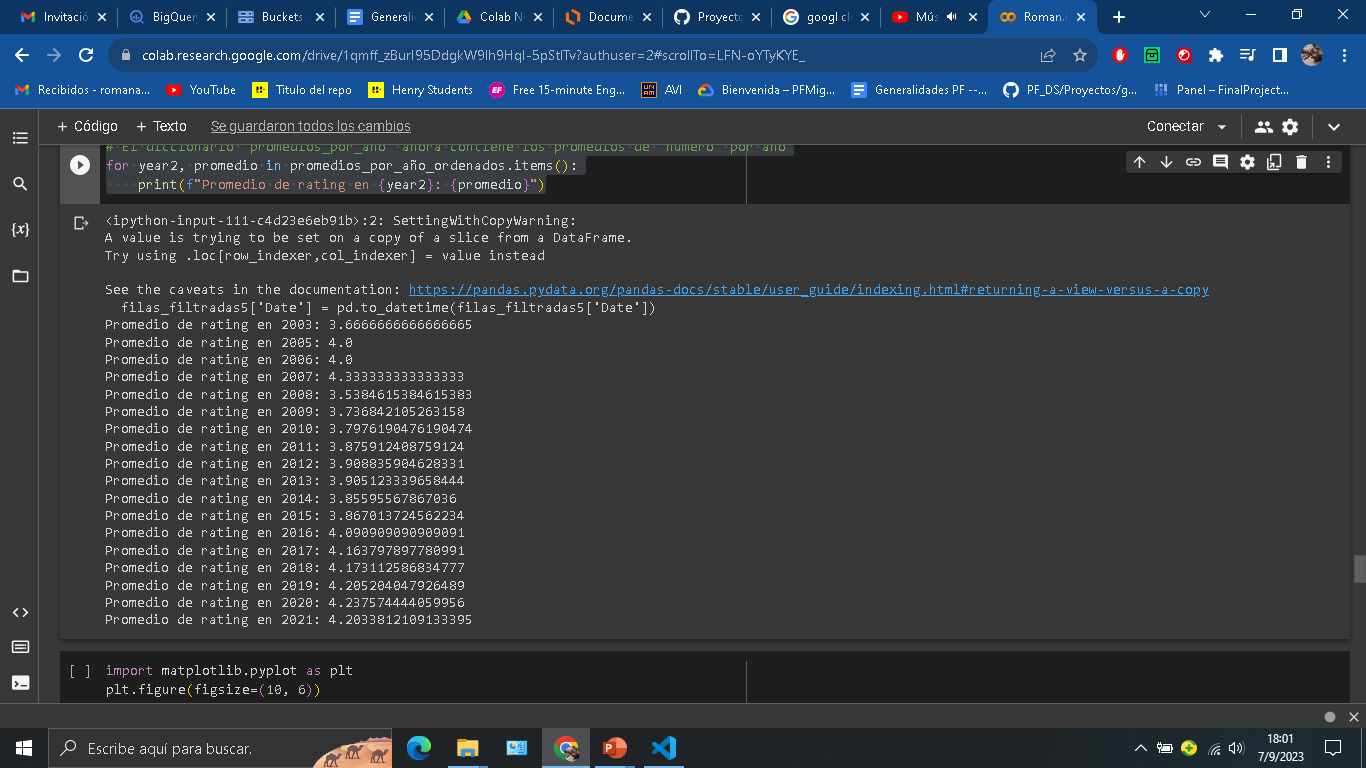

y ahora en forma de gráfico:

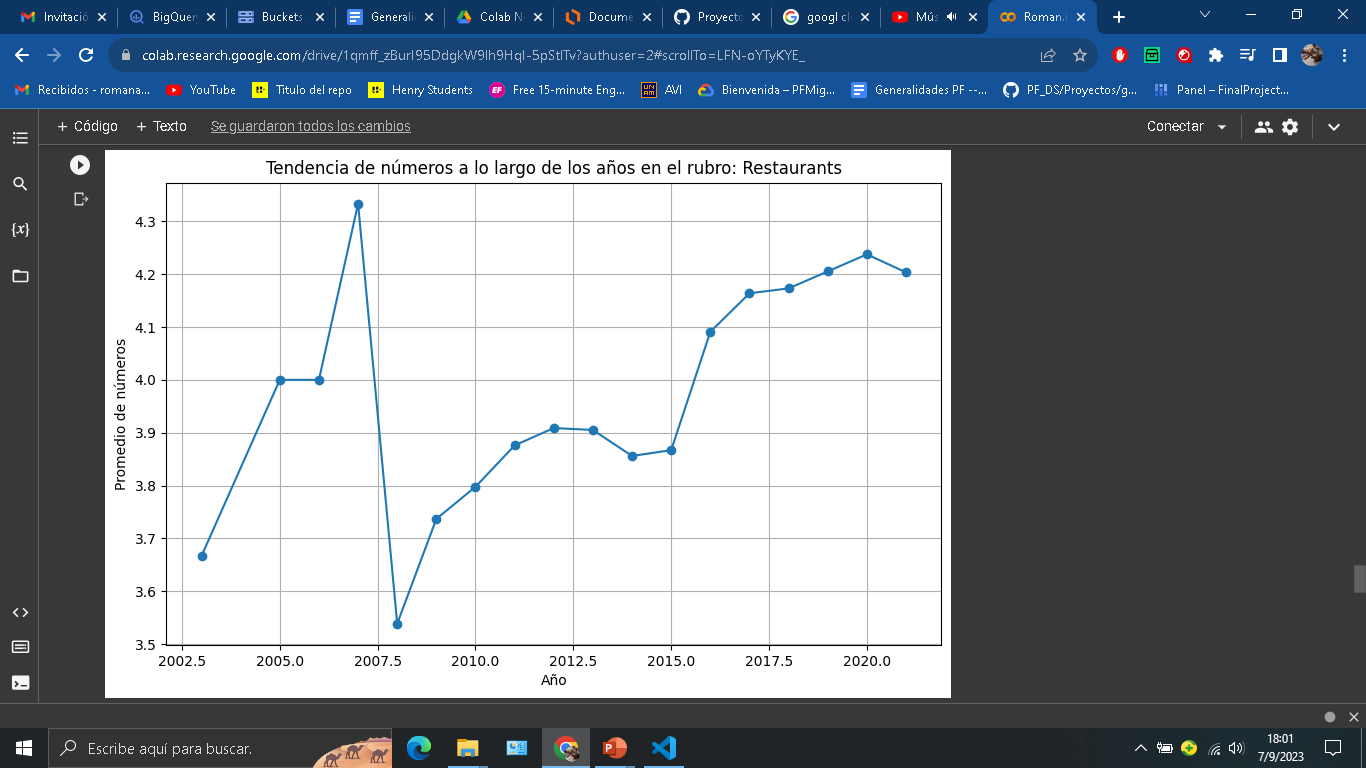

Esto son todos los datos que utilizamos de estos datasets, decidimos que la mejor categoría para el proyecto es 'restaurats', también de aquí utilizamos el rating, y para el modelo de Machine Learning va a servirnos la nube de palabras de la columna 'text'